In [10]:
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input, Convolution1D, Convolution2D
from keras.regularizers import l2, activity_l2

from random import randint
from keras.layers import Merge, LSTM, Dense
# Features: ['Adj_Close', 'Close', 'Date', 'High', 'Low', 'Open', 'Symbol', 'Volume']
from sklearn import preprocessing

testData = np.genfromtxt('testData.txt', dtype = None)

In [11]:
# Part 1  
# One single featuere
X0 = [] # Adj_Close
X1 = [] #
X2 = [] #
X3 = [] #
X4 = [] # High
X5 = [] #

for tuple in testData:
    X4.append(tuple[4])
#####(..)start
X4n2= preprocessing.normalize(X4) #,norm='l2')

X4n2=X4n2[0]
#####(..)end
size = 1000
window = 25
X = np.empty([0, window])
Y = np.zeros(size)
batchSize = 10

for i in range(size):
    start = randint(0, len(testData)-window-1)
    X = np.concatenate((X, np.asarray(X4n2[start : start + window]).reshape(1, window)), axis = 0)
##(..)
    Y[i] = X4[start + window]  #Y dont want denormalized
################################################

print(X.shape)
print(Y.shape)
print X[0]
print Y[0]

model = Sequential()
model.add(Dense(1, input_dim = window))
keras.optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer='rmsprop',loss='mse') # for a mean squared error regression problem
history = model.fit(X, Y, validation_split=0.33, batch_size=batchSize, nb_epoch=1000, initial_epoch=0)
print(history)

/Users/Gene/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


(1000, 25)
(1000,)
[ 0.04214467  0.04240855  0.04255933  0.04127765  0.04105148  0.0410986
  0.04116456  0.04141902  0.04186195  0.04223891  0.04241797  0.04116456
  0.04158865  0.04173001  0.04213525  0.04232373  0.04222949  0.04092896
  0.04095723  0.04028812  0.03999597  0.04012791  0.03992058  0.03975095
  0.04021273]
43.400002
Train on 669 samples, validate on 331 samples
Epoch 1/1000
669/669 [==============================] - 0s - loss: 1474.8480 - val_loss: 1458.5897
Epoch 2/1000
669/669 [==============================] - 0s - loss: 1464.9718 - val_loss: 1448.9015

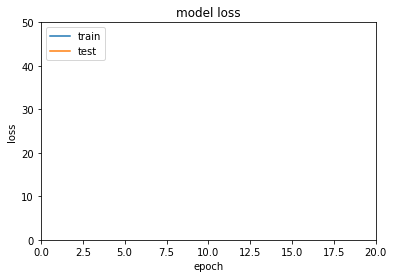

In [12]:
plt.axis((0, 20, 0, 50))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
training_loss = model.evaluate(X, Y, batch_size=batchSize, verbose=1)
print("\nMSE: {}".format(training_loss))

 750/1000 [=====================>........] - ETA: 0s
MSE: 6.83479419351


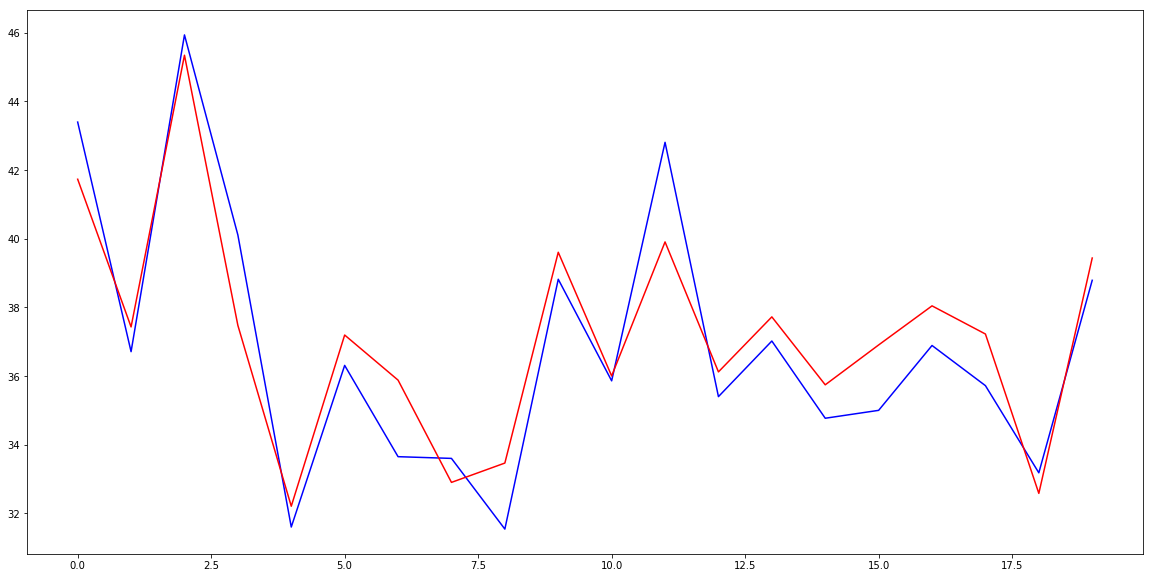

 460/1000 [============>.................] - ETA: 0s

In [14]:
scope = 20  # should be smaller than len(Y)
YHat = model.predict(X, batch_size=batchSize, verbose=0)
YHat = np.ravel(YHat)
x = np.arange(0, scope)
plt.figure(figsize=(20,10))
plt.plot(x, Y[0:scope], 'b', x, YHat[0:scope], 'r')
plt.show()
training_loss = model.evaluate(X, Y, batch_size=batchSize, verbose=1)

In [15]:
# Part 2
# Multiple featueres
# X0 = [] # Adj_Close
# X1 = [] #
# X2 = [] #
# X3 = [] #
# X4 = [] # High
# X5 = [] #

# Features: ['Adj_Close', 'Close', 'Date', 'High', 'Low', 'Open', 'Symbol', 'Volume']

# make feature 2 - dates to be number comvertable
for tuple in testData:
    tuple[2] = tuple[2].replace("-", "")
    
# convert feature 6 - stock name to be stock-id (Yahoo == 1)
for tuple in testData:
    tuple[6] = 1

# 7 features so far
data = [[], [], [], [], [], [], [], []]  #add []
for tuple in testData:
    for i in range(len(data)):
            data[i].append(float(tuple[i]))
            #print i

for i in range(len(data)):
    data[i]= preprocessing.normalize(data[i]) #,norm='l2')
    data[i] = data[i][0]
    #print i
#print data[7]#(..)
# Remove redunt features
# Features: ['Adj_Close', 'Close', 'Date', 'High', 'Low', 'Open', 'Symbol', 'Volume']
data = [data[0], data[1], data[3], data[4], data[5],data[7]]
            
# convert data into numpy 2d array
data = np.asarray(data)   

print(data.shape)

# print(X)
print data[0]

(6, 756)
[ 0.03603396  0.03600601  0.03608987  0.03626692  0.03602465  0.03587555
  0.03648125  0.03649056  0.035801    0.03597806  0.03579169  0.03812127
  0.0386431   0.03848468  0.03891333  0.03858719  0.03775786  0.03724535
  0.03745967  0.03733853  0.03692853  0.03822377  0.03876423  0.03862446
  0.038084    0.03816786  0.03821445  0.03830764  0.03838218  0.03862446
  0.0381865   0.03746899  0.03662102  0.03766467  0.0374224   0.03840082
  0.03835423  0.03825173  0.03753421  0.03748762  0.03790695  0.03851264
  0.03871764  0.03893196  0.03901583  0.03921152  0.03964947  0.03968675
  0.03929538  0.03949106  0.03981721  0.03883878  0.03894128  0.03861514
  0.03878287  0.03947243  0.03977061  0.04092608  0.0402738   0.04070245
  0.0407304   0.04023653  0.04018994  0.04016198  0.03966811  0.04071176
  0.04041358  0.0394072   0.03988243  0.04114041  0.04113109  0.03987312
  0.04024585  0.04069313  0.04099132  0.04049744  0.04010607  0.04049744
  0.03999425  0.04133609  0.04132677  0.04

/Users/Gene/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/Gene/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/Gene/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.

In [16]:
size = 1000
window = 25

# Three dim
# dim1: each datum
# dim2: TimeStep: a sequence of consecutive values 
# dim3: Feature Dimention: There are 7 features
X = np.empty([0, window, len(data)])  
Y = np.zeros(size)
batchSize = 20

print(data.shape)
print(X.shape)
print(data[:, 0:0 + window].shape)
for i in range(size):
    start = randint(0, len(testData)-window-1)
    oneSlice = data[:, start:start + window].T
    # to concatenate, we need to reshape one slice to 3d
    X = np.concatenate((X, np.asarray(oneSlice).reshape(1, window, len(data))), axis = 0) 
    Y[i] = data[2][start + window]    # Need to figure out which is high 
# print(X)
# X = X.reshape(len(X), len(data)*window)
print(X.shape)

(6, 756)
(0, 25, 6)
(6, 25)
(1000, 25, 6)


In [17]:
# BestParameter so far, mse = 7.5
# model.add(LSTM(80, input_shape=(window, len(data))))
# model.add(Dense(70))
# model.add(Dense(50))
# model.add(Dense(30))
# model.add(Dense(10))
# model.add(Dense(1))

# mse = 6.9
# model.add(Convolution1D(len(data), window*0.5, border_mode='same', input_shape=(window, len(data))))
# model.add(LSTM(int(p*0.8), input_shape=(window, len(data))))
# model.add(Dense(p*0.6))
# model.add(Dense(p*0.3))
# model.add(Dense(p*0.1))
# model.add(Dense(3))
# model.add(Dense(1))

In [18]:
print data[5]

[ 0.01030673  0.0066828   0.00704064  0.00679514  0.00615381  0.01872633
  0.01324253  0.02405036  0.02180572  0.03436975  0.06995966  0.03092306
  0.01041698  0.00713359  0.01095478  0.01469409  0.0115365   0.01112753
  0.00705378  0.0137305   0.02021507  0.01221837  0.01161197  0.01084229
  0.00414554  0.00582498  0.01423224  0.0181693   0.01302796  0.01392472
  0.02498751  0.01738952  0.02033173  0.02432327  0.02634837  0.03845808
  0.00677399  0.00863547  0.00733022  0.0125182   0.02086072  0.01882777
  0.00597866  0.00990385  0.01159659  0.0098029   0.00855566  0.00696597
  0.0115288   0.01870294  0.02328853  0.03102595  0.01381431  0.01246964
  0.02514296  0.01168313  0.01524519  0.01053428  0.01362473  0.01008606
  0.00980402  0.01442006  0.01276546  0.01662576  0.02198761  0.01188905
  0.01404603  0.0204242   0.05110176  0.0534528   0.01973287  0.01568685
  0.01263967  0.03059823  0.02008575  0.01861688  0.01623667  0.01732125
  0.01932744  0.01263197  0.01459794  0.02904684  0

In [19]:
model = Sequential()
p = window*len(data)
print(p)
# model.add(Convolution1D(64, 3, border_mode='same', input_shape=(10, 32)))
model.add(Convolution1D(len(data), window*0.2, border_mode='same', input_shape=(window, len(data))))
model.add(LSTM(int(p*0.4), input_shape=(window, len(data))))
model.add(Dense(p*0.3))
model.add(Dense(p*0.1))
model.add(Dense(3))
model.add(Dense(1))
model.compile(optimizer='rmsprop',loss='mse') # a mean squared error regression problem
history = model.fit(X, Y, validation_split=0.33, batch_size=batchSize, nb_epoch=20, initial_epoch=0)
print(history)

150
Train on 669 samples, validate on 331 samples
Epoch 1/20
669/669 [==============================] - 5s - loss: 3.0210e-04 - val_loss: 1.6300e-04